# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>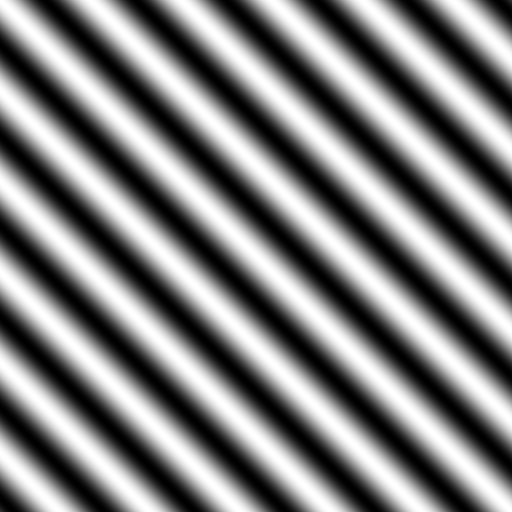</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
import os
import imageio
from PIL import Image
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


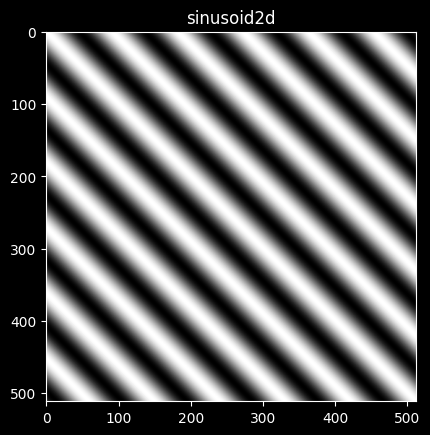

: 

In [ ]:

I=sinusoid2d(A=1,theta=45,T0=64,Te=1,size=512)


plt.imshow(I,cmap='gray')
plt.title('sinusoid2d')
plt.show()


2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

On sait que $f^{max}_t= \frac{1}{T}$

In [3]:
#calculons Tt (horizontal) et Tu (vertical)

Tu= 64.0 / np.cos(np.radians(45.0)) 
Tt= 64.0 / np.sin(np.radians(45.0))
fm=1/(np.max([Tu,Tt]))

print("Tu = ",Tu," Tt = ",Tt)
print("fmax = ",fm)


Tu =  90.50966799187808  Tt =  90.50966799187809
fmax =  0.011048543456039804


2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

Text(0.5, 1.0, 'signal sampled at 16*fmax')

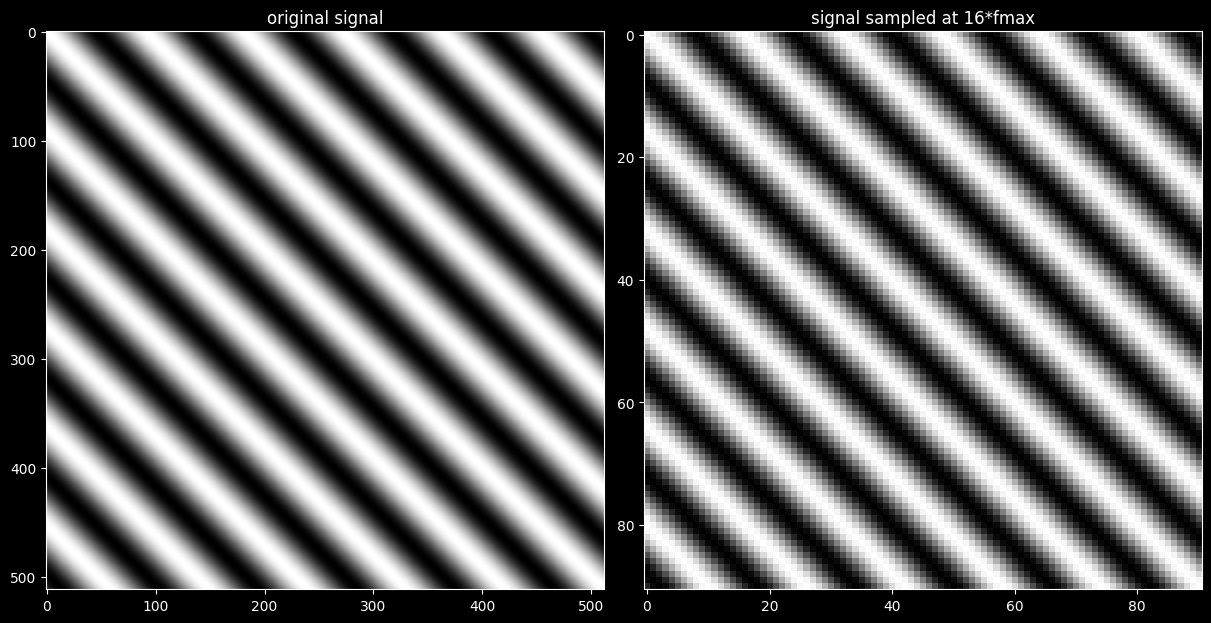

In [4]:
axs = (plt.figure(constrained_layout=True,figsize=(1000//80,1000//80))
       .subplots(1, 2, sharex=False, sharey=False))
axs[0].imshow(I,cmap="gray")
axs[0].set_title('original signal')
I2=sinusoid2d(A=1,theta=45,T0=64,Te=1/(16*fm),size=512)
axs[1].imshow(I2,cmap="gray")
axs[1].set_title('signal sampled at 16*fmax')

Ici on fait varier la fréquence de Sampling

In [84]:


display_gif('exo1_1_3_1.gif')

In [80]:
display_gif('exo1_2_32_1.gif')

Ici on fait varier la periode du signal en gardant une fréquence de sampling constante

In [93]:
display_gif('exo1_2_1.gif')

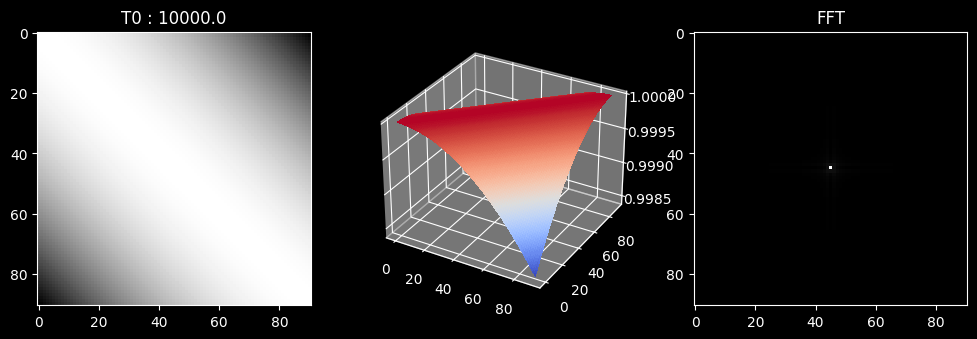

In [61]:
fig = plt.figure(figsize=(1000//80,1000//80))

I2=sinusoid2d(A=1,theta=45,T0=1e4,Te=1/(64*fm),size=128)
ax = fig.add_subplot(1, 3, 1)
ax.imshow(I2,cmap="gray")
ax.set_title("T0 : "+str(1e4))
ax = fig.add_subplot(1, 3, 2, projection='3d')
X,Y = np.meshgrid(range(I2.shape[1]), range(I2.shape[0]))

ax.plot_surface(X, Y, I2, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(I2)))),cmap="gray")
ax.set_title('FFT')

plt.show()

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

(voir le gif juste au dessus)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

Comme on peut le voir il y a bien 2pics de dirac.

en augmentant le nombre de samples on remarque plusieurs choses:

• le signal est de mieux en mieux représenté. En effet en augmentant le sampling on augmente la quantité d'information "prise" sur le signal. Cette information est visible sur l'image

• on augmente la résolution et donc la taille de l'image, la taille de la FFT augmente aussi.

• les deux pics de dirac correspondent aux composantes cos et sin du signal. On remarque qu'en augmentant T0, (à $T_0=10^3$ les deux pics sont confondus) on observe plus q'un pic. On peut supposer que cela est dû au fait qu'on ne voit plus qu'une partie "blanche" du signal sur l'image, décrite par seulement un cos dans la FFT (la composante sin est nulle). 

• à côté des deux pics de dirac il y a des lobes. Cela vient du fait que les pic de dirac sont représentés par des sinus cardinaux dans l'espace de la FFT. les lobes sont des "résidus" des sinc.



3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [8]:
def error(I1,I2,A,L):

    res=0
    min_taille=min(I1.shape[0],I2.shape[0])
    for i in range(min_taille):
        for j in range(min_taille):
            res+=np.abs(I1[i,j]-I2[i,j])
    return (1/(2*A*np.square(L)))*res

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

l'erreur vient du fait que qu'en dessous de 2fm, il n'y a pas assez de samples et la periode est faussée. En dessous de 2fm la periode du signal reconstruit est plus longue que la periode initiale.

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

On observe que si il n'y a pas assez de sample , le signal reconstruit a une mauvaise periode (periode trop longue comparé au signal original)

In [54]:
Tu_1= 64.0 / np.cos(np.radians(10.0)) 
Tt_1= 64.0 / np.sin(np.radians(10.0))
fm_1=max(1/Tu_1,1/Tt_1)

print(fm_1)


print("fmax = ",fm_1)

0.015387621140815749
fmax =  0.015387621140815749


In [58]:
display_gif("exo1_3_10.gif")

Comme on peut le voir , avec une fréquence d'échantillonage inferieure à 2fm on peut changer l'orientation de composants géométriques d'une image


6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [1]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [33]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

Text(0.5, 1.0, 'subsampled 2 ')

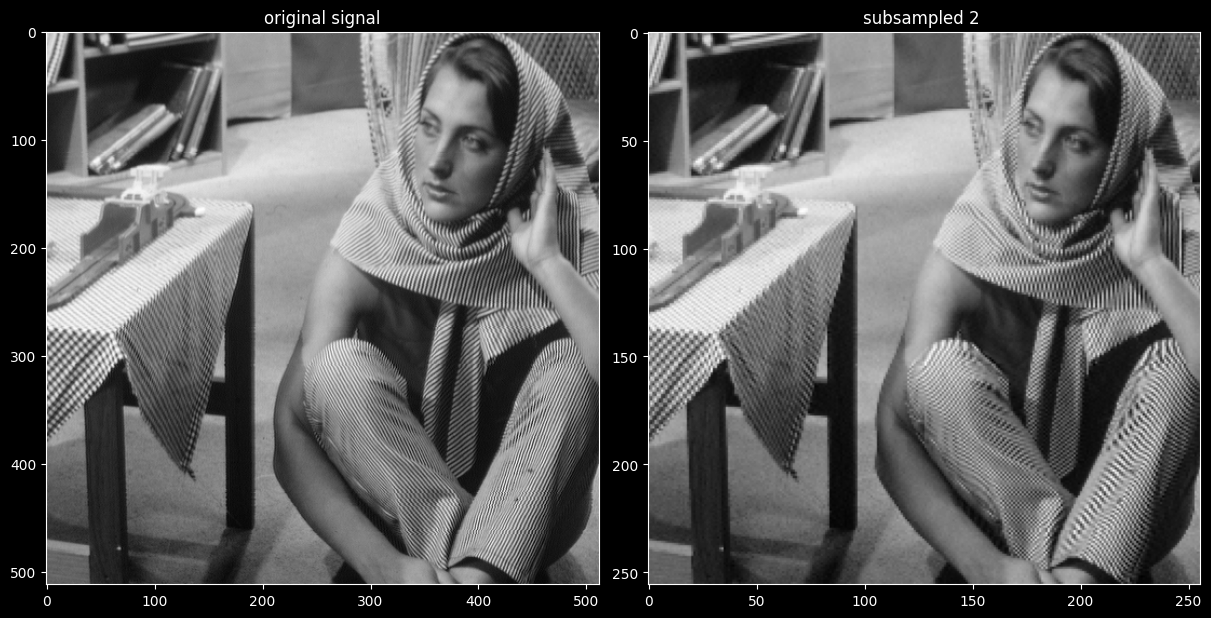

In [34]:
axs = (plt.figure(constrained_layout=True,figsize=(1000//80,1000//80))
       .subplots(1, 2, sharex=False, sharey=False))
axs[0].imshow(barbara ,cmap="gray")
axs[0].set_title('original signal')
I2=sinusoid2d(A=1,theta=45,T0=64,Te=1/(16*fm),size=512)
axs[1].imshow(subSample2(barbara),cmap="gray")
axs[1].set_title('subsampled 2 ')

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

l'opération va retirer une ligne sur deux de l'image et une colonne sur deux de l'image d'origne. l'image originale fait 512x512 pixels et ensuite 256x256

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

In [35]:
#VARIATION FREQUENCE
nb_images=5
nb_s=4
tmp_bar=barbara.copy()

for i in range(0,nb_s,1):

    fig = plt.figure(figsize=plt.figaspect(0.25))

    tmp_bar=subSample2(tmp_bar)
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(barbara,cmap="gray")
    ax.set_title('barbara')
    ax = fig.add_subplot(1, 3, 2)

    ax.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(tmp_bar)))+1),cmap="gray")
    ax.set_title('FFT')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(tmp_bar,cmap="gray")
    ax.set_title('subsampled ('+str(tmp_bar.shape[0])+'x'+str(tmp_bar.shape[1])+')')
    plt.savefig('./img/images_gif_1/exo1_'+str(i)+'.png')
    plt.close()

with imageio.get_writer('exo2_1.gif', mode='I') as writer:
    for i in range(0,nb_s,1):
        image = imageio.imread('./img/images_gif_1/exo1_'+str(i)+'.png')
        for i in range(nb_images):
            writer.append_data(image)

for i in range(1,nb_s,1):
    os.remove('./img/images_gif_1/exo1_'+str(i)+'.png') 

In [37]:
display_gif('exo2_1.gif')

In [21]:
display_gif('barbara_zoom_3.gif')

avec la méthode de zoom experimentée en dessous on peut bien voir le processus d'aliasing. Peu à peu les motifs géométriques se deteriorent en motifs de moiré

Lors du subsampling nous avons enlevé beaucoup d'information à l'image. One le voit bien avec la FT qui est beaucoup moins complexe. sur l'image on remarque que des motifs de moiré apparaissent. Ces motifs sont particulièrement visibles sur les textures "géométriques" de l'image traitée comme on peut le voir sur barbara (nappe,pantalon,foulard)

3. Bonus question: same question with the image `img/mandrill.png`.

In [39]:
display_gif('exo2_2.gif')


In [26]:
display_gif('mandrill_zoom.gif')

# Image Interpolation Using Sampling


In [114]:
lena = np.array(Image.open('img/lena_std.tiff').convert("L"))
barbara = np.array(Image.open('img/barbara.png'))
lena_tmp=lena[240:290,240:290]
lena_rec=lena.copy()
lena_rec[240:243,240:290]=255
lena_rec[240:290,240:243]=255
lena_rec[290:293,240:290]=255
lena_rec[240:290,290:293]=255


In [115]:
fm_lena1=2/lena_tmp.shape[0]
#Reconstructed_i1=shannonInterpolation(lena_tmp, 1/(7.5*fm_lena1), 410)
Reconstructed_i1=shannonInterpolation(lena_tmp, 1/(3.*fm_lena1), 410)

fm_lena2=2/lena.shape[0]
Reconstructed_i2=shannonInterpolation(lena, 1/(64*fm_lena2),2048)

Text(0.5, 1.0, 'reconstructed with the full original')

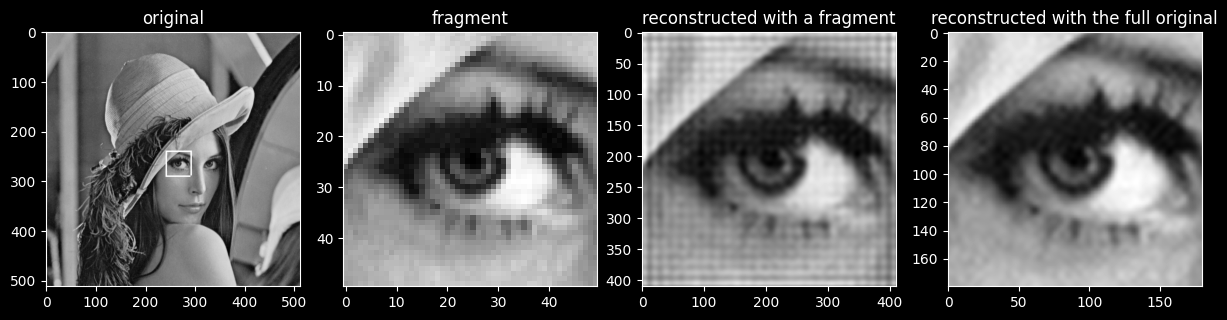

In [116]:


axs = (plt.figure(constrained_layout=True,figsize=(1000//80,1000//80))
       .subplots(1, 4, sharex=False, sharey=False))

axs[0].imshow(lena_rec,cmap="gray")
axs[0].set_title('original')

axs[1].imshow(lena_tmp,cmap="gray")
axs[1].set_title('fragment')

axs[2].imshow(Reconstructed_i1,cmap="gray")
axs[2].set_title('reconstructed with a fragment')

axs[3].imshow(Reconstructed_i2[970:1150,970:1150],cmap="gray")
axs[3].set_title('reconstructed with the full original')

In [30]:
display_gif('lena_zoom_2.gif')

L'interpolation permet de passer d'un espace discret à un espace continu. Pour cette raison en interpolant une partie pixélisée de l'image on parvient à "zoomer" sur l'image sans voir les pixels. (Ici on a multiplié la résolution par 4).

In [106]:
barbara_tmp=barbara[240:320,240:320]

barbara_rec=barbara.copy()
barbara_rec[240:243,240:320]=255
barbara_rec[240:320,240:243]=255
barbara_rec[320:323,240:320]=255
barbara_rec[240:320,320:323]=255

fm_barbara1=2/barbara_tmp.shape[0]
Reconstructed_barbara1=shannonInterpolation(barbara_tmp, 1/(7.5*fm_barbara1), 410)

fm_barbara2=2/lena.shape[0]
Reconstructed_barbara2=shannonInterpolation(barbara, 1/(64*fm_barbara2),2048)

Text(0.5, 1.0, 'reconstructed with the full original')

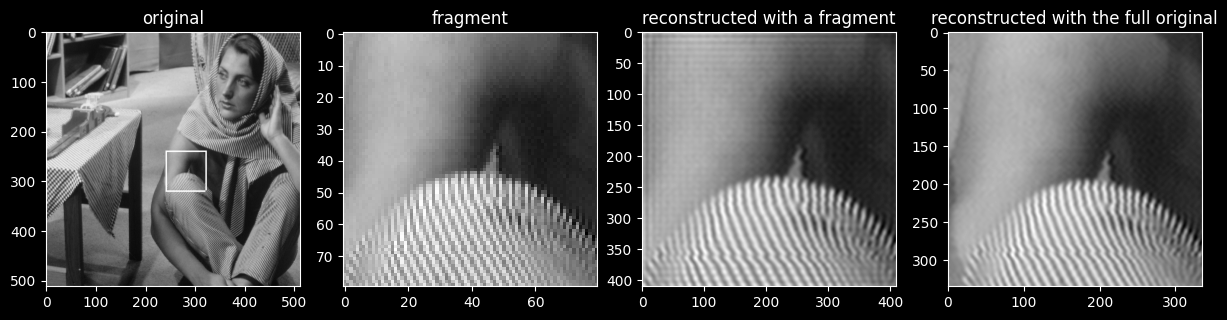

In [107]:
axs = (plt.figure(constrained_layout=True,figsize=(1000//80,1000//80))
       .subplots(1, 4, sharex=False, sharey=False))

axs[0].imshow(barbara_rec,cmap="gray")
axs[0].set_title('original')

axs[1].imshow(barbara_tmp,cmap="gray")
axs[1].set_title('fragment')

axs[2].imshow(Reconstructed_barbara1,cmap="gray")
axs[2].set_title('reconstructed with a fragment')

axs[3].imshow(Reconstructed_barbara2[940:1275,940:1275],cmap="gray")
axs[3].set_title('reconstructed with the full original')

In [11]:
display_gif('barbara_zoom.gif')

# Fonctions pour la génération de gifs

## première partie

### variation de la fréquence

In [55]:
nb_images=256
tmp_arr=np.linspace(1.0,3.0,nb_images)

#VARIATION FREQUENCE
for i in range(0,tmp_arr.shape[0],1):

    fig = plt.figure(figsize=plt.figaspect(0.25))

    I2=sinusoid2d(A=1,theta=10,T0=64,Te=1/(tmp_arr[i]*fm_1),size=512)
    Reconstructed_i2=shannonInterpolation(I2, 1/(tmp_arr[i]*fm_1), 512)

    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(I2,cmap="gray")
    ax.set_title('sampling frequency = '+str(np.round(tmp_arr[i],3))+'* fm')
    #ax = fig.add_subplot(1, 4, 2, projection='3d')
    X,Y = np.meshgrid(range(I2.shape[1]), range(I2.shape[0]))
    #ax.set_title('3D signal')
    #ax.plot_surface(X, Y, I2, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(X, Y, +np.abs(np.fft.fftshift(np.fft.fft2(I2))), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title('FT')
    

    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(Reconstructed_i2,cmap="gray")
    ax.set_title('reconstructed signal')
    plt.savefig('./img/images_gif_1/exo1_'+str(i)+'.png')
    plt.close()

### variation de la periode

In [62]:
nb_images=2
tmp_arru=np.linspace(10,200,nb_images)

for i in range(0,tmp_arru.shape[0],1):
    fig = plt.figure(figsize=plt.figaspect(0.25))

    I2=sinusoid2d(A=1,theta=45,T0=tmp_arru[i],Te=1/(64*fm),size=128)
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(I2,cmap="gray")
    ax.set_title("T0 : "+str(tmp_arru[i]))
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    X,Y = np.meshgrid(range(I2.shape[1]), range(I2.shape[0]))

    ax.plot_surface(X, Y, I2, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(I2)))),cmap="gray")
    ax.set_title('FFT')


    plt.savefig('./img/images_gif_1/exo1_'+str(i)+'.png')
    plt.close()

### Zoom

In [23]:
nb_images=128
tmp_arr=np.linspace(256,1024,nb_images)
w,h=400,400
pic = np.array(Image.open('img/mandrill.png').convert("L"))
fm_pic = 2/pic.shape[0]
for i in range(0,tmp_arr.shape[0],1):

    Reconstructed_i2=shannonInterpolation(pic, 1/(tmp_arr[i]*fm_pic),256)
    plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
    plt.gray() # optional call to display image using a gray colormap
    plt.title('interpolation :'+str(np.round(tmp_arr[i],3))+" * fm") # optional: add a title
    #txt="size : ("+str(Reconstructed_i2.shape[0])+","+str(Reconstructed_i2.shape[1])+")"
    #plt.figtext(0.5,0.01,txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.imshow(Reconstructed_i2)
    
    

    

    plt.savefig('./img/images_gif_1/exo1_'+str(i)+'.png')
    plt.close()

### génération du gif

In [24]:
nom_gif="mandrill_zoom.gif"


with imageio.get_writer(nom_gif, mode='I') as writer:
    for i in range(0,nb_images,1):
        image = imageio.v2.imread('./img/images_gif_1/exo1_'+str(i)+'.png')
        writer.append_data(image)

for i in range(1,nb_images,1):
    os.remove('./img/images_gif_1/exo1_'+str(i)+'.png') 

In [25]:
display_gif(nom_gif)